<a href="https://colab.research.google.com/github/pauljohn99/ClassSpringBoot/blob/main/Copy_of_mouthAnotationLoaded-refined.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# !pip install pycocotools --quiet
# !git clone https://github.com/pytorch/vision.git
# !git checkout v0.3.0
# !cp vision/references/detection/utils.py ./
# !cp vision/references/detection/transforms.py ./
# !cp vision/references/detection/coco_eval.py ./
# !cp vision/references/detection/engine.py ./
# !cp vision/references/detection/coco_utils.py ./

In [19]:
# import os
# import random
import numpy as np
# import pandas as pd
# for ignoring warnings
# import warnings
# warnings.filterwarnings('ignore')

# We will be reading images using OpenCV
import cv2

# xml library for parsing xml files
# from xml.etree import ElementTree as et

# matplotlib for visualization
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# torchvision libraries
import torch
import torchvision
from torchvision import transforms as torchtrans  
# from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

# these are the helper libraries imported.
# from engine import train_one_epoch, evaluate
# import utils
# import transforms as T

# import requests

# for image augmentations
# import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2

In [20]:
# from google.colab import drive
# drive.mount('/content/drive')

In [39]:
test_dir = '/content/clear9.jpg'

In [22]:
# device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [23]:
model = torch.load("/content/mouth_anotation.pt",map_location=torch.device('cpu'))

In [24]:
def apply_nms(orig_prediction, iou_thresh=0.3):
    
    # torchvision returns the indices of the bboxes to keep
    keep = torchvision.ops.nms(orig_prediction['boxes'], orig_prediction['scores'], iou_thresh)
    
    final_prediction = orig_prediction
    final_prediction['boxes'] = final_prediction['boxes'][keep]
    final_prediction['scores'] = final_prediction['scores'][keep]
    final_prediction['labels'] = final_prediction['labels'][keep]
    
    return final_prediction

# function to convert a torchtensor back to PIL image
def torch_to_pil(img):
    return torchtrans.ToPILImage()(img).convert('RGB')

In [25]:
def convertor(img, width, height,transforms=None):
  img = cv2.imread(img)
       
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB).astype(np.float32)
  img_res = cv2.resize(img_rgb, (width,height), cv2.INTER_AREA)
        # diving by 255
  img_res /= 255.0
  if transforms:
            
            sample = transforms(image = img_res)
            
            img_res = sample['image']
  return img_res

In [26]:
def mouth_anotation(test_dir):
 test_dataset = convertor(test_dir, 480, 480, ToTensorV2(p=1.0))
# pick one image from the test set
#  y=len(test_dataset)
 model.eval()
#  for i in range(y):
 img= test_dataset
#  # put the model in evaluation mode
#  model.eval()
 with torch.no_grad():
  prediction = model([img])[0]
  # i=i+1  
#  print('EXPECTED OUTPUT\n')
#  plot_img_bbox(torch_to_pil(img), target)
 print('MODEL OUTPUT\n')
 nms_prediction = apply_nms(prediction, iou_thresh=0.1)
#  print(nms_prediction['scores'])
#  print(nms_prediction['scores'].detach().cpu().numpy())
 p=nms_prediction['scores'].detach().cpu().numpy()
 pr=np.argmax(p)
 x=max(p)
 print(x)
 print(nms_prediction)
 pred=np.reshape(nms_prediction['boxes'][pr].detach().cpu().numpy(), (-1, 4))
 print(pred[0])
 
 pred1={'boxes': pred}
 print(pred1)
 pre=pred[0]
 print(pre[0],pre[1],pre[2]-pre[0],pre[3]-pre[1])

#  print('NMS APPLIED MODEL OUTPUT')
 plot_img_bbox(torch_to_pil(img), pred1)

MODEL OUTPUT

0.46457967
{'boxes': tensor([[238.1283, 263.4340, 325.7629, 375.7311],
        [311.3193, 269.4154, 377.5003, 398.7575],
        [ 36.5487,  87.8129, 335.0505, 443.1837]]), 'labels': tensor([1, 1, 1]), 'scores': tensor([0.4646, 0.3839, 0.2343])}
[238.12828 263.43396 325.76288 375.73108]
{'boxes': array([[238.12828, 263.43396, 325.76288, 375.73108]], dtype=float32)}
238.12828 263.43396 87.6346 112.29712
<class 'matplotlib.patches.Rectangle'>


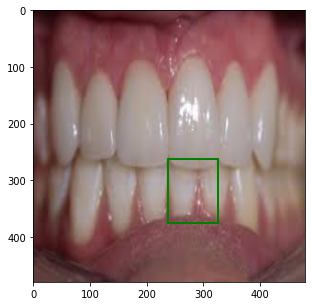

In [40]:
# test_dataset = MouthImagesDataset(test_dir, 480, 480, ToTensorV2(p=1.0))
mouth_anotation(test_dir)

In [ ]:
def plot_img_bbox(img, target):
    # plot the image and bboxes
    # Bounding boxes are defined as follows: x-min y-min width height
    fig, a = plt.subplots(1,1)
    fig.set_size_inches(5,5)
    a.imshow(img)
    for box in (target['boxes']):
        x, y, width, height  = box[0], box[1], box[2]-box[0], box[3]-box[1]
        rect = patches.Rectangle((x, y),
                                 width, height,
                                 linewidth = 2,
                                 edgecolor = 'g',
                                 facecolor = 'none')

        # Draw the bounding box on top of the image
        print(type(rect))
        a.add_patch(rect)
    plt.show()
    
# plotting the image with bboxes. Feel free to change the index
# img, target = dataset[0]
# plot_img_bbox(img, target)

In [ ]:
# class MouthImagesDataset:

#     def __init__(self,img, width, height, transforms=None):
#         self.transforms = transforms
#         # self.files_dir = files_dir
#         self.height = height
#         self.width = width
        
#         # sorting the images for consistency
#         # To get images, the extension of the filename is checked to be jpg
#         self.imgs = img
        
          
#         # classes: 0 index is reserved for background
#         self.classes = [_,'mouth']

#     def __str__(self):

#         # img_name = self.imgs[idx]
#         # image_path = os.path.join(self.files_dir, img_name)
#         image_path=self.imgs

#         # reading the images and converting them to correct size and color    
#         img = cv2.imread(image_path)
       
#         img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB).astype(np.float32)
#         img_res = cv2.resize(img_rgb, (self.width, self.height), cv2.INTER_AREA)
#         # diving by 255
#         img_res /= 255.0
# #         # annotation file
# #         annot_filename = img_name[:-4] + '.xml'
# #         annot_file_path = os.path.join(self.files_dir, annot_filename)
        
# #         boxes = []
# #         labels = []
# #         tree = et.parse(annot_file_path)
# #         root = tree.getroot()
        
# #         # cv2 image gives size as height x width
# #         wt = img.shape[1]
# #         ht = img.shape[0]
        
# #         # box coordinates for xml files are extracted and corrected for image size given
# #         for member in root.findall('object'):
# #             labels.append(self.classes.index(member.find('name').text))
            
# #             # bounding box
# #             xmin = int(member.find('bndbox').find('xmin').text)
# #             xmax = int(member.find('bndbox').find('xmax').text)
            
# #             ymin = int(member.find('bndbox').find('ymin').text)
# #             ymax = int(member.find('bndbox').find('ymax').text)
            
            
# #             xmin_corr = (xmin/wt)*self.width
# #             xmax_corr = (xmax/wt)*self.width
# #             ymin_corr = (ymin/ht)*self.height
# #             ymax_corr = (ymax/ht)*self.height
            
# #             boxes.append([xmin_corr, ymin_corr, xmax_corr, ymax_corr])
        
# #         # convert boxes into a torch.Tensor
# #         boxes = torch.as_tensor(boxes, dtype=torch.float32)
        
# #         # getting the areas of the boxes
# #         area = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0])

# #         # suppose all instances are not crowd
# #         iscrowd = torch.zeros((boxes.shape[0],), dtype=torch.int64)
        
# #         labels = torch.as_tensor(labels, dtype=torch.int64)


# #         target = {}
# #         target["boxes"] = boxes
# #         target["labels"] = labels
# #         target["area"] = area
# #         target["iscrowd"] = iscrowd
# #         # image_id
# #         image_id = torch.tensor([idx])
# #         target["image_id"] = image_id


#         if self.transforms:
            
#             sample = self.transforms(image = img_res,
#                                      )
            
#             img_res = sample['image']
# #             target['boxes'] = torch.Tensor(sample['bboxes'])
            
            
            
#         # return img_res, target
#         return img_res
#     def __len__(self):
#         return len(self.imgs)




In [ ]:
# # Send train=True fro training transforms and False for val/test transforms
# def get_transform(train):
    
#     if train:
#         return A.Compose([
#                             A.HorizontalFlip(0.5),
#                      # ToTensorV2 converts image to pytorch tensor without div by 255
#                             ToTensorV2(p=1.0) 
#                         ], bbox_params={'format': 'pascal_voc', 'label_fields': ['labels']})
#     else:
#         return A.Compose([
#                             ToTensorV2(p=1.0)
#                         ], bbox_params={'format': 'pascal_voc', 'label_fields': ['labels']})

In [ ]:
# def mouth_anotation(test_dataset):
#  test_dataset = convertor(test_dataset, 480, 480, ToTensorV2(p=1.0))
# # pick one image from the test set
#  y=len(test_dataset)
#  model.eval()
#  for i in range(y):
#   img= test_dataset[i]
# #  # put the model in evaluation mode
# #  model.eval()
#   with torch.no_grad():
#     prediction = model([img.to(device)])[0]
#   i=i+1  
# #  print('EXPECTED OUTPUT\n')
# #  plot_img_bbox(torch_to_pil(img), target)
#   print('MODEL OUTPUT\n')
#   nms_prediction = apply_nms(prediction, iou_thresh=0.1)
# #  print(nms_prediction['scores'])
# #  print(nms_prediction['scores'].detach().cpu().numpy())
#   p=nms_prediction['scores'].detach().cpu().numpy()
#   pr=np.argmax(p)
#   x=max(p)
#   print(x)
#   print(nms_prediction)
#   pred=np.reshape(nms_prediction['boxes'][pr].detach().cpu().numpy(), (-1, 4))
#   print(pred[0])
# #   pred1={'boxes': pred}
# #   print(pred1)
# # #  print('NMS APPLIED MODEL OUTPUT')
# #   plot_img_bbox(torch_to_pil(img), pred1)